# Recovery of gold from ore
Objective: preparing a prototype of a machine learning model for a company that develops solutions for the efficient operation of industrial enterprises.

The model must predict the recovery rate of gold from gold ore. Use data with mining and purification parameters.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

**Data Description**

*Technological process*

- Rougher feed - feedstock
- Rougher additions (or reagent additives) - flotation reagents: Xanthate, Sulphate, Depressant
- Xanthate - promoter, or flotation activator
- Sulphate - in this production, sodium sulfide
- Depressant - sodium silicate
- Rougher process - flotation
- Rougher tails - flotation
- Float banks - flotation unit
- Cleaner process
- Rougher Au - rough gold concentrate
- Final Au - final gold concentrate

*Stage parameters*

- air amount
- fluid levels
- feed size - size of raw material granules
- feed rate

**Purpose of the study**

- Perform data analysis
- Build models for assessing the efficiency of gold recovery from gold ore, assessing their quality by cross-validation
- Propose a model with the smallest sMAPE

**Brief report:**

Data was obtained from three files for three samples gold_recovery_train_new.csv, gold_recovery_test_new.csv, gold_recovery_full_new.csv.

3 types of regression models with different hyperparameters were built and predictions were obtained for validation samples.

The cross-validation technique was used to assess the quality of the model, and a comparison was made. A model with minimal sMAPE is proposed.

## Data overview and preprocessing
### Overview

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

In [2]:
STATE = 1337
data_train = pd.read_csv('D:\\Jupyter\\14. Summary project 2\\gold_industry_train.csv')
data_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
data_test = pd.read_csv('D:\\Jupyter\\14. Summary project 2\\gold_industry_test.csv')
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [6]:
set(data_train.columns) - set(data_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

data_test is missing output and calculation columns. Such partial data can be used to make predictions, but is not applicable for assessing their quality, including sMAPE. It will be necessary to match data_test and data_full to calculate accuracy and such

In [7]:
data_full = pd.read_csv('D:\\Jupyter\\14. Summary project 2\\gold_industry_full.csv')
data_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [8]:
set(data_full.columns) - set(data_train.columns)

set()

data_full has the same columns as data_train
### Checking the efficiency calculation

In [9]:
data_train['recovery_check'] = data_train['rougher.output.concentrate_au'] * (data_train['rougher.input.feed_au'] - 
                                                                             data_train['rougher.output.tail_au']) / ( 
    data_train['rougher.input.feed_au'] * (data_train['rougher.output.concentrate_au'] -
                                          data_train['rougher.output.tail_au'])) * 100
mean_absolute_error(data_train['rougher.output.recovery'], data_train['recovery_check'])

9.83758577644259e-15

Absolute error can be considered zero, and the calculation correct
### Preprocessing
Almost every column has a small number of missing values, but these gaps are often not in the same row. This means that simply removing gaps will result in the loss of a large amount of data. Let's replace them with median values; this should not lead to a serious error in creating the model.

In [10]:
for data in [data_train, data_test, data_full]:
    for column in data.columns:
        try:
            data[column] = data[column].fillna(data[column].median())
        except:
            pass

**Conclusion**

The data was studied and the correctness of the calculated values was verified. Missing values are replaced with median values
## Data analysis
### Changes in metal concentrations at different stages

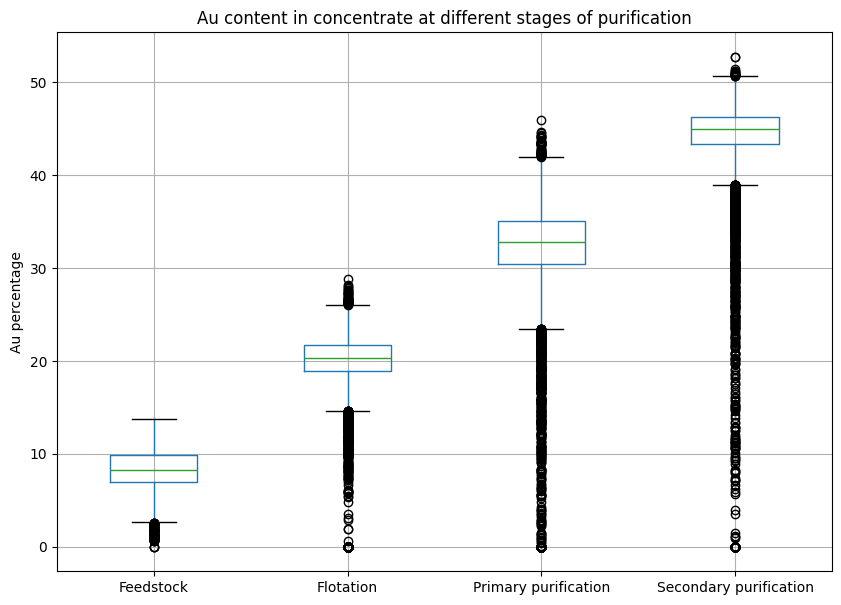

In [11]:
plt.rcParams["figure.figsize"] = (10,7)
ax = data_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
            'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].boxplot()

plt.title('Au content in concentrate at different stages of purification')
plt.ylabel('Au percentage')
ax.set_xticklabels(['Feedstock', 'Flotation', 'Primary purification', 'Secondary purification'])
plt.show()

The process is going in the right direction, gold concentration is increasing

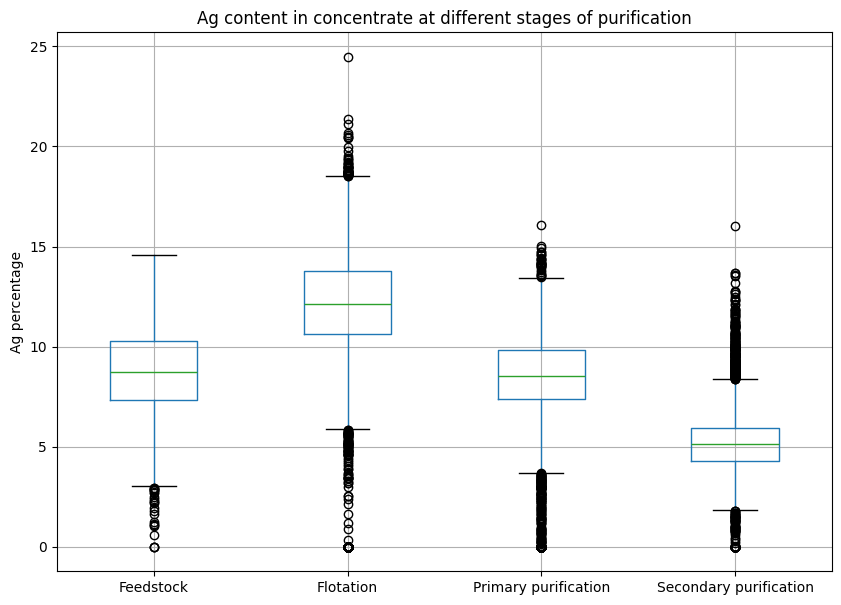

In [12]:
ax = data_train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
            'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].boxplot()

plt.title('Ag content in concentrate at different stages of purification')
plt.ylabel('Ag percentage')
ax.set_xticklabels(['Feedstock', 'Flotation', 'Primary purification', 'Secondary purification'])
plt.show()

Apparently silver is not the target metal, its concentration drops after purifications

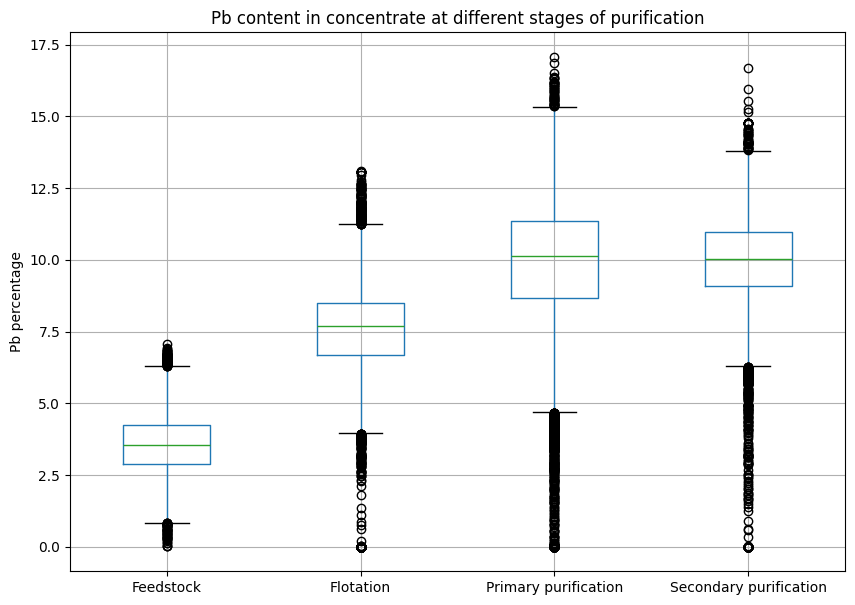

In [13]:
ax = data_train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
            'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].boxplot()

plt.title('Pb content in concentrate at different stages of purification')
plt.ylabel('Pb percentage')
ax.set_xticklabels(['Feedstock', 'Flotation', 'Primary purification', 'Secondary purification'])
plt.show()

Lead is a by-product that is not removed at the purification stage
### Comparison of raw material granule size distribution

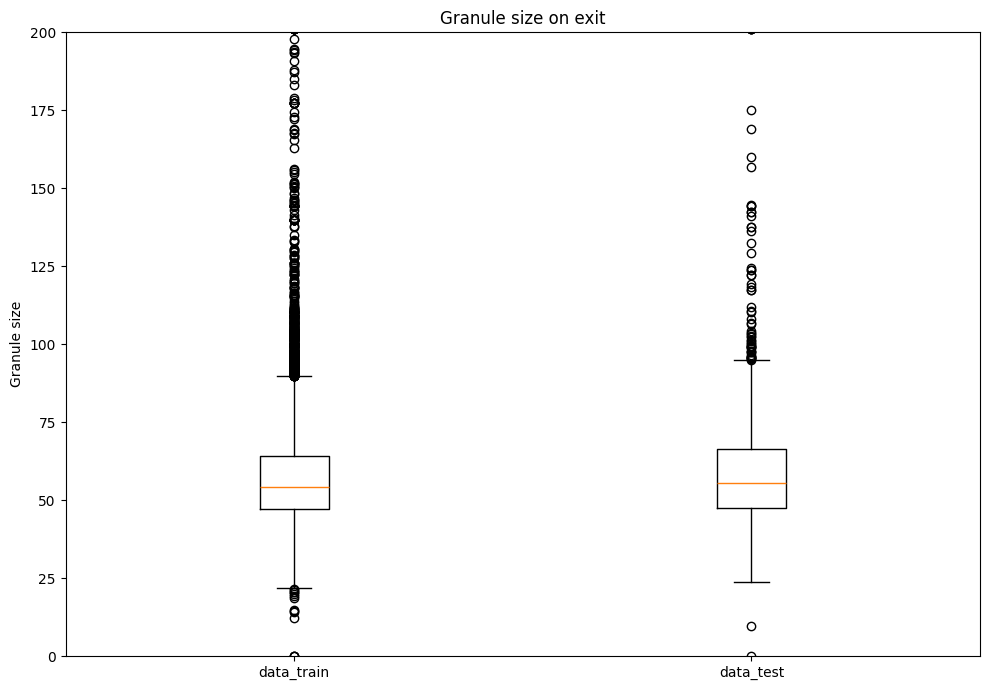

In [14]:
plt.boxplot([data_train['rougher.input.feed_size'],
             data_test['rougher.input.feed_size']],
           labels=['data_train','data_test'])
plt.ylabel('Granule size')
plt.title('Granule size on exit')
plt.ylim((0,200))
plt.tight_layout()
plt.show()

In [15]:
print(data_train['rougher.input.feed_size'].mean())
print(data_test['rougher.input.feed_size'].mean())

58.89111097865585
59.08077155394703


There is no significant difference in the raw materials

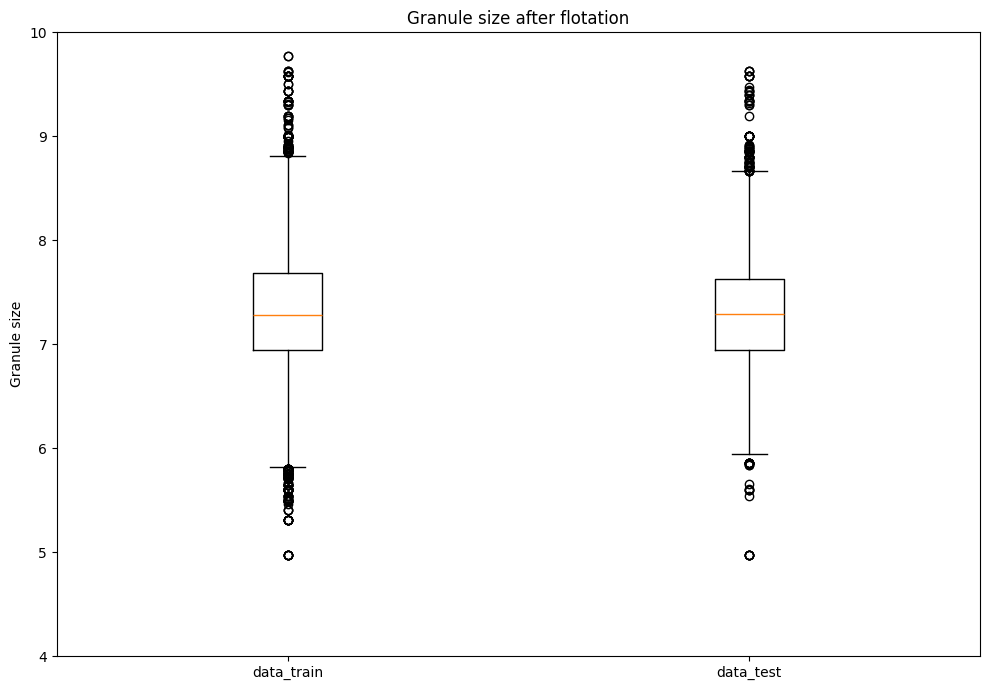

In [16]:
plt.boxplot([data_train['primary_cleaner.input.feed_size'],
             data_test['primary_cleaner.input.feed_size']],
           labels=['data_train','data_test'])
plt.ylabel('Granule size')
plt.title('Granule size after flotation')
plt.ylim((4,10))
plt.tight_layout()
plt.show()

In [17]:
print(data_train['primary_cleaner.input.feed_size'].mean())
print(data_test['primary_cleaner.input.feed_size'].mean())

7.307599824418361
7.305514270447427


There is no significant difference in the rough concentrate

### Total concentration of all substances

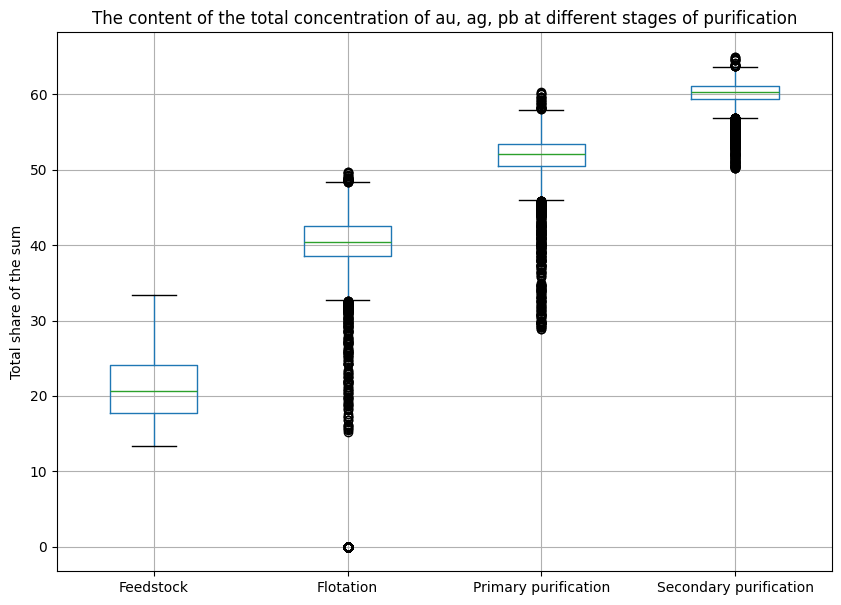

In [18]:
stages_raw = ['rougher.input.feed_', 'rougher.output.concentrate_', 
              'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
metals = ['au', 'ag', 'pb']
stages = []
stages_n = 0
for stage in stages_raw:
    for metal in metals:
        col_name = stage + metal
        sum_name = 'st_' + str(stages_raw.index(stage)) + '_sum'
        if sum_name not in data_train.columns:
            data_train[sum_name] = 0
        if sum_name not in stages:
            stages.append(sum_name)
            stages_n += 1
        data_train[sum_name] += data_train[col_name]
for stage in stages:
    q_0025 = data_train[stage].quantile(0.025)
    data_train = data_train[(data_train[stage] >= q_0025)].reset_index(drop=True)
ax = data_train[stages].boxplot()

plt.title('The content of the total concentration of au, ag, pb at different stages of purification')
plt.ylabel('Total share of the sum')
ax.set_xticklabels(['Feedstock', 'Flotation', 'Primary purification', 'Secondary purification'])
plt.show()

The total concentration of metals is increasing. Removed lower 0.025 quantile

**Conclusion**

The concentrations of metals at various stages were studied and the granule size distributions of the training and test samples were compared. No discrepancies were found. The total concentration of metals at different stages of purification was resolved and outliers were removed

## Model training and testing
### Training

In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13511 entries, 0 to 13510
Data columns (total 92 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                13511 non-null  object 
 1   rougher.input.feed_au                               13511 non-null  float64
 2   rougher.input.feed_ag                               13511 non-null  float64
 3   rougher.input.feed_pb                               13511 non-null  float64
 4   rougher.input.feed_sol                              13511 non-null  float64
 5   rougher.input.feed_rate                             13511 non-null  float64
 6   rougher.input.feed_size                             13511 non-null  float64
 7   rougher.input.floatbank10_sulfate                   13511 non-null  float64
 8   rougher.input.floatbank10_xanthate                  13511 non-null  float64


In [20]:
# function to calculate sMAPE
def smape(F, A):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(F) + np.abs(A)))

SET_MIN_EST = 10
SET_MAX_EST = 41
SET_STEP_EST = 15
SET_MIN_DEPTH = 1
SET_MAX_DEPTH = 6
SET_STEP_DEPTH = 2
N_SAMPLES = 4

for data in [data_train, data_test]:
    if (len(data) % 2) != 0:
        data.drop(data.tail(1).index,inplace=True)
features, target = ( data_train[data_test.columns].drop('date', axis=1), 
                    data_train[['rougher.output.recovery', 'final.output.recovery']])



def get_result(models, model, features, target):
    sample_size = int(len(target)/N_SAMPLES)
    scores = []
    for i in range(0, len(target)-2, sample_size):
        # cross-validation
        valid_indexes = range(i, i + sample_size)
        train_indexes = list(range(0, i)) + list(range(i + sample_size, len(target)))
        features_train = features.reindex(index = train_indexes)
        features_valid = features.reindex(index = valid_indexes)
        target_train = target.reindex(index = train_indexes)
        target_valid = target.reindex(index = valid_indexes)
        # rough concentrate
        features_train_rougher = features_train[[col for col in data_test.columns if 'rougher' in col]]
        features_valid_rougher = features_valid[[col for col in data_test.columns if 'rougher' in col]]
        
        model = model.fit(features_train_rougher, target_train[target.columns[0]])
        predictions_valid = model.predict(features_valid_rougher)
        score_1 = smape(predictions_valid, target_valid[target.columns[0]])
        # final concentrate
        model = model.fit(features_train, target_train[target.columns[1]])
        predictions_valid = model.predict(features_valid)
        score_2 = smape(predictions_valid, target_valid[target.columns[1]])
        # final smape
        score = score_1 * 0.25 + score_2 * 0.75
        scores.append(score)
    final_score = sum(scores)/N_SAMPLES
    new_data = pd.DataFrame({'smape': [final_score],
                         'max_depth': [depth],
                         'n_estimators': [est]})
    models = pd.concat([models, new_data], ignore_index=True)
    return models

#### DecisionTreeRegressor

In [21]:
models_DecisionTree = pd.DataFrame()
est = None
for depth in range(SET_MIN_DEPTH,SET_MAX_DEPTH, SET_STEP_DEPTH):
    model = DecisionTreeRegressor(random_state=STATE, max_depth=depth)
    models_DecisionTree = get_result(models_DecisionTree, model, features, target)
    print('done depth', depth)
print('\nDecisionTreeRegressor')
models_DecisionTree = models_DecisionTree.drop('n_estimators', 
                                               axis=1).sort_values(by=['smape']).head().reset_index(drop=True)
display(models_DecisionTree)

done depth 1
done depth 3
done depth 5

DecisionTreeRegressor


,smape,max_depth
0,10.075305,3
1,10.212975,1
2,10.911992,5


#### RandomForestRegressor

In [22]:
models_RandomForest_c = pd.DataFrame()
for est in range(SET_MIN_EST, SET_MAX_EST, SET_STEP_EST):
    for depth in range(SET_MIN_DEPTH, SET_MAX_DEPTH, SET_STEP_DEPTH):
        model = RandomForestRegressor(random_state=STATE, max_depth=depth, n_estimators=est)
        models_RandomForest_c = get_result(models_RandomForest_c, model, features, target)
        print('done depth', depth,', est', est)
models_RandomForest = models_RandomForest_c.copy()

done depth 1 , est 10
done depth 3 , est 10
done depth 5 , est 10
done depth 1 , est 25
done depth 3 , est 25
done depth 5 , est 25
done depth 1 , est 40
done depth 3 , est 40
done depth 5 , est 40



RandomForestRegressor


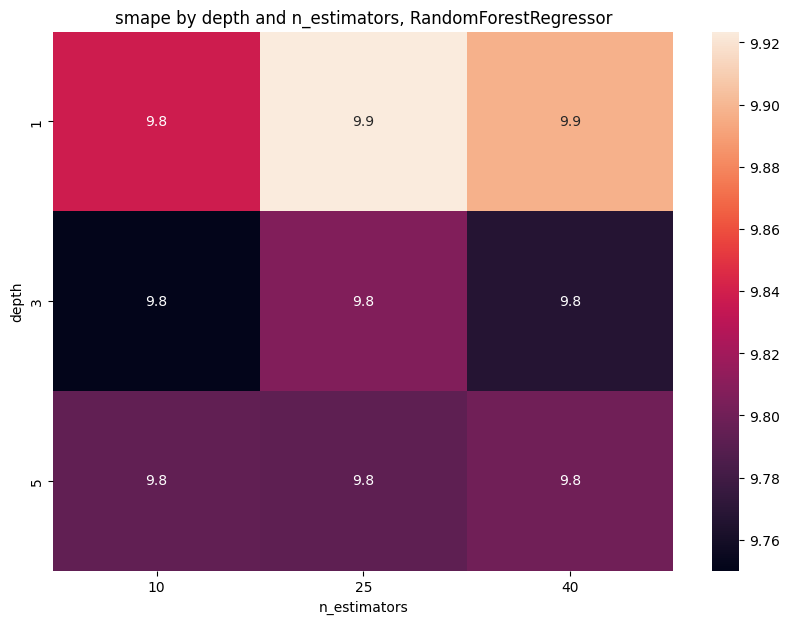

,smape,max_depth,n_estimators
0,9.750077,3,10
1,9.767130,3,40
2,9.792176,5,25
3,9.793939,5,10
4,9.800120,5,40


In [23]:
print('\nRandomForestRegressor')
(
sns.heatmap(models_RandomForest_c.pivot(index='max_depth', columns='n_estimators', values='smape'), annot=True)
   .set(title='smape by depth and n_estimators, RandomForestRegressor',
        xlabel='n_estimators', 
        ylabel='depth')
)
plt.show()
models_RandomForest = models_RandomForest.sort_values(by=['smape']).head().reset_index(drop=True)
display(models_RandomForest)

#### LinearRegression

In [24]:
models_Linear = pd.DataFrame()
model = LinearRegression()
models_Linear = get_result(models_Linear, model, features, target)
print()
print('LinearRegression')
print('smape:',models_Linear.smape[0])


LinearRegression
smape: 10.90018199652722


#### Test sample evaluation
The best model was RandomForestRegressor, by a small margin.

Let's restore data_test to assess quality

In [25]:
data_test_0 = pd.merge(data_test, data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                       on='date', how='left')

In [26]:
features_test, target_test = ( data_test_0[data_test.columns].drop('date', axis=1), 
                               data_test_0[['rougher.output.recovery', 'final.output.recovery']])

models = pd.DataFrame()
model = RandomForestRegressor(random_state=STATE, max_depth=models_RandomForest['max_depth'][0], 
                              n_estimators=models_RandomForest['n_estimators'][0].astype('int'))
model = model.fit(features, target[target.columns[0]])
predictions = model.predict(features_test)
score_1 = smape(predictions, target_test[target.columns[0]])

model = model.fit(features, target[target.columns[1]])
predictions = model.predict(features_test)
score_2 = smape(predictions, target_test[target.columns[1]])

score_best = score_1 * 0.25 + score_2 * 0.75
print('smape test:',score_best)
print('smape valid:',models_RandomForest.smape[0])

smape test: 7.539831308381387
smape valid: 9.750077434853303


The test sample estimate exceeds validation sample's, the model is well trained
#### Sanity test

In [27]:
models = pd.DataFrame()
model = DummyRegressor()
model = model.fit(features, target[target.columns[0]])
predictions = model.predict(features_test)
score_1 = smape(predictions, target_test[target.columns[0]])

model = model.fit(features, target[target.columns[1]])
predictions = model.predict(features_test)
score_2 = smape(predictions, target_test[target.columns[1]])

score_const = score_1 * 0.25 + score_2 * 0.75
print('smape test:',score_best)
print('smape nul:',score_const)

smape test: 7.539831308381387
smape nul: 8.657100456695543


Null model shows worse sMAPE than our model, this it is adequate
## General conclusion
The best model became RandomForestRegressor with a depth of 3 and the number of trees 40

Let's review the relative influence of features

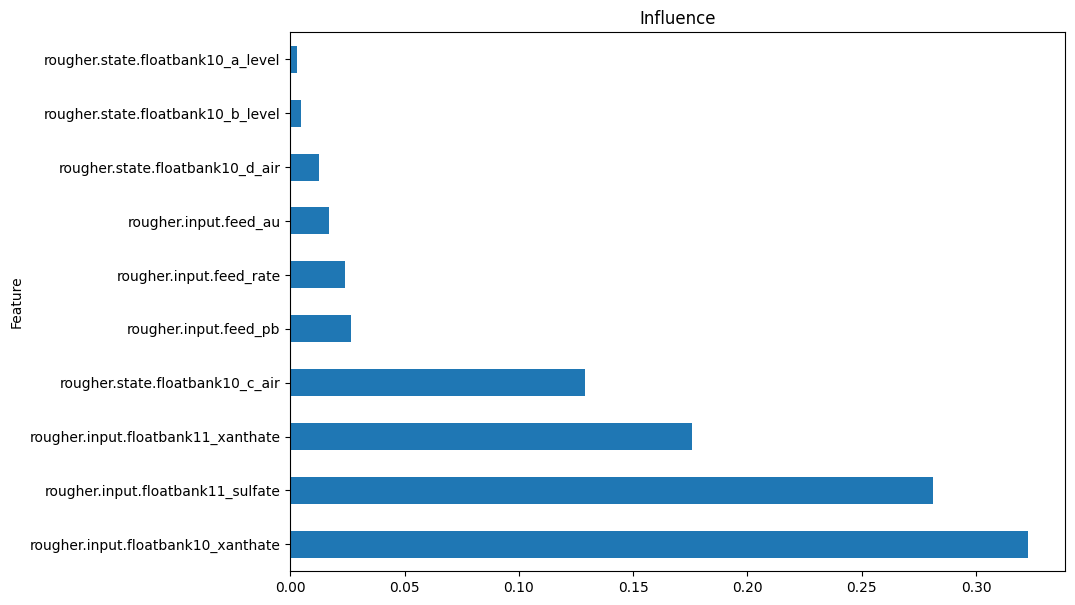

In [30]:
model = RandomForestRegressor(random_state=STATE, max_depth=models_RandomForest['max_depth'][0], 
                              n_estimators=models_RandomForest['n_estimators'][0].astype('int'))

features_rougher = features[[col for col in data_test.columns if 'rougher' in col]]
model = model.fit(features_rougher, target[target.columns[0]])
(
pd.Series(model.feature_importances_, index=features_rougher.columns)
    .sort_values(ascending=False).head(10)
    .plot.barh(title="Influence",ylabel='Feature')
)
plt.show()

In [32]:
features_rougher.columns

Index(['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate'],
      dtype='object')

The efficiency of converting gold into rough concentrate is most influenced by the supply of rougher additives.

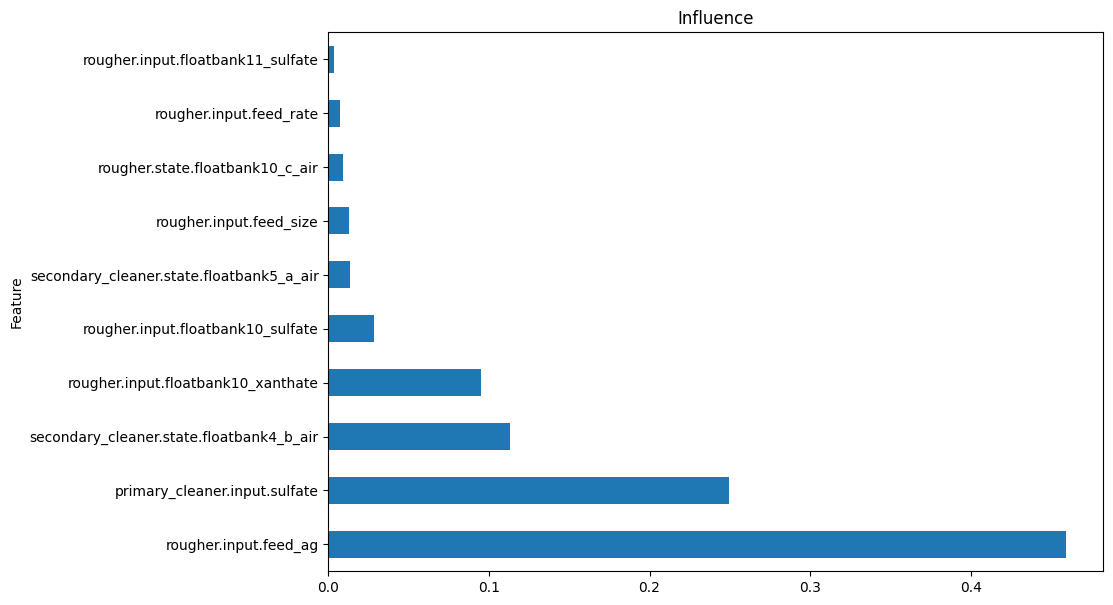

In [31]:
model = model.fit(features, target[target.columns[1]])
(
pd.Series(model.feature_importances_, index=features.columns)
    .sort_values(ascending=False).head(10)
    .plot.barh(title="Influence",ylabel='Feature')
)
plt.show()

The efficiency of converting gold into the final concentrate is most influenced by the silver content in feedstock, as well as input of sulfate to the primary purification plant.

It is important to note that the influence of different features is highly dependent on the cumulative effect. This influence will be associated with maintaining the entire process as a whole in a certain state. For a more detailed explanation, I advise you to take courses in chemical process engineering at your nearest department of chemical technology.